In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasett1/archive (6)/metadata.csv
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Shotgun_64.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Sword_67.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Automatic Rifle_77.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/SMG_81.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/SMG_38.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Handgun_22.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Sniper_14.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Sword_4.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Bazooka_82.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/SMG_31.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Sniper_75.jpeg
/kaggle/input/datasett1/archive (6)/weapon_detection/val/images/Bazooka_72.jpeg
/k

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import random
import os
from PIL import Image

import pandas as pd
from xml.dom import minidom
import csv

In [3]:
image_dir='/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images'
annot_dir='/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/annotations/xmls'

In [4]:
import cv2
import numpy as np
def rescaling(path_image,targetSize,xmin,ymin,xmax,ymax):
    # imageToPredict = cv2.imread("img.jpg", 3)
    imageToPredict = cv2.imread(path_image, 3)

    # Note: flipped comparing to your original code!
    # x_ = imageToPredict.shape[0]
    # y_ = imageToPredict.shape[1]
    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    x_scale = targetSize / x_
    y_scale = targetSize / y_
    img = cv2.resize(imageToPredict, (targetSize, targetSize));
    img = np.array(img);

    # original frame as named values
    (origLeft, origTop, origRight, origBottom) = (xmin,ymin,xmax,ymax)

    xmin = int(np.round(origLeft * x_scale))
    ymin = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    # Box.drawBox([[1, 0, x, y, xmax, ymax]], img)
    #drawBox([[1, 0, xmin, ymin, xmax, ymax]], img)
    return img,xmin,ymin,xmax,ymax

In [5]:
def exteract_xml_contents(annot_directory,image_dir ,target_size=300):
    
    file=minidom.parse(annot_directory)
    
    #get the height and width of the image
    height,width=cv2.imread(image_dir).shape[:2]
    
    #get the bounding box
    
    xmin=file.getElementsByTagName('xmin')
    x1=float(xmin[0].firstChild.data)
    
    ymin=file.getElementsByTagName('ymin')
    y1=float(ymin[0].firstChild.data)
    
    xmax=file.getElementsByTagName('xmax')
    x2=float(xmax[0].firstChild.data)
    
    ymax=file.getElementsByTagName('ymax')
    y2=float(ymax[0].firstChild.data)
    
    class_name=file.getElementsByTagName('name')
    if class_name[0].firstChild.data=='knife':
        class_num=1
    else:
        class_num=0
        
    files=file.getElementsByTagName('filename')
    file_name=files[0].firstChild.data
    
    #return the exteracted attributes
    img,xmin,ymin,xmax,ymax=rescaling(image_dir,target_size,x1,y1,x2,y2)
    width=img.shape[0]
    height=img.shape[1]
    return file_name,width,height,class_num,xmin,ymin,xmax,ymax

In [6]:
def xml_to_csv(image_dir,annot_dir):
    #List containing all our attributes regarding each image
    
    xml_list=[]
    
    #get each files in the image and annotation  directory
    mat_files=os.listdir(annot_dir)
    img_files=os.listdir(image_dir)
    
    #loop over each of the image and its labels
    
    for i,image in enumerate(img_files):
        xp=image.split('.')
        mat_path=os.path.join(annot_dir,(str(xp[0])+'.xml'))
        img_path=os.path.join(image_dir,image)
        #get attributes for each image
        value=exteract_xml_contents(mat_path,img_path)
        
        xml_list.append(value)
    
    #columns for the pandas dataframe
    columns_name=['file_name','width','height','class_num',
                 'xmin','ymin','xmax','ymax']
    
    xml_df=pd.DataFrame(xml_list,columns=columns_name)
    
    #return the dataframe
    
    return xml_df

In [7]:
train_labels_df=xml_to_csv(image_dir,annot_dir)
train_labels_df.to_csv(('dataset.csv'),index=None)

In [8]:
train_labels_df

,file_name,width,height,class_num,xmin,ymin,xmax,ymax
0,KravMagaKnifeDefenseTechniques773.jpg,300,300,1,120,193,160,220
1,billete_0013.jpg,300,300,0,91,1,289,295
2,KravMagaTraining21141.jpg,300,300,1,176,139,215,194
3,DefenseKnifeAttack0731.jpg,300,300,1,122,250,164,278
4,KravMagaTraining688.jpg,300,300,1,142,121,157,178
...,...,...,...,...,...,...,...,...
817,DefenseKnifeAttack1422.jpg,300,300,1,111,51,148,89
818,KravMagaKnifeDefenseTechniques246.jpg,300,300,1,173,77,209,100
819,DSC_00491.jpg,300,300,1,82,177,118,192
820,DefenseKnifeAttack0456.jpg,300,300,1,55,230,85,286


In [9]:
class_list=sorted(['knife','no weapon'])

In [10]:
def preprocess_dataset(image_dir,csv_file):
    #list that will contain the whole dataset
    
    labels =[]
    boxes =[]
    img_list=[]
    
    
    with open(csv_file) as csvfile:
        
        rows=csv.reader(csvfile)
        columns=next(iter(rows))
        none={}
        for i,row in enumerate(rows):
            
            img_path=row[0]
            full_path=os.path.join(image_dir,img_path)
            img=cv2.imread(full_path)
            if img is None:
                none[i]=str(full_path)
            else:
                img=cv2.imread(full_path)
                
                image=cv2.resize(img,(300,300))
                

                # Normalize the image by dividing it by 255.0 
                image = image.astype("float") / 255.0

                # Append it to the list of images
                img_list.append(image)

                labels.append(int(row[3]))
                #scalling coordinates to the range of the [0,1] by dividing the cordinate by image size 1096 here
                arr=[float(row[4])/300,
                    float(row[5])/300,
                    float(row[6])/300,
                    float(row[7])/300]
                boxes.append(arr)
            
           
        return labels ,boxes,img_list,none

In [11]:
train_labels,train_boxes,train_img,train_none=preprocess_dataset(image_dir,'dataset.csv')

[ WARN:0@42.012] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images/billete_0160.jpg'): can't open/read file: check file path/integrity
[ WARN:0@45.408] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images/billete_0177.jpg'): can't open/read file: check file path/integrity
[ WARN:0@48.204] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images/billete_2113.jpg'): can't open/read file: check file path/integrity
[ WARN:0@48.374] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images/billete_0180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@49.576] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/weapon-detection-datasett/Sohas_weapon-Detection/images/billete_0174.jpg'): can't open/read file: check file path/integrity


In [12]:
combined_list=list(zip(train_img,train_boxes,train_labels))
random.shuffle(combined_list)
#exteract back the content of each list
train_img,train_boxes,train_labels=zip(*combined_list)

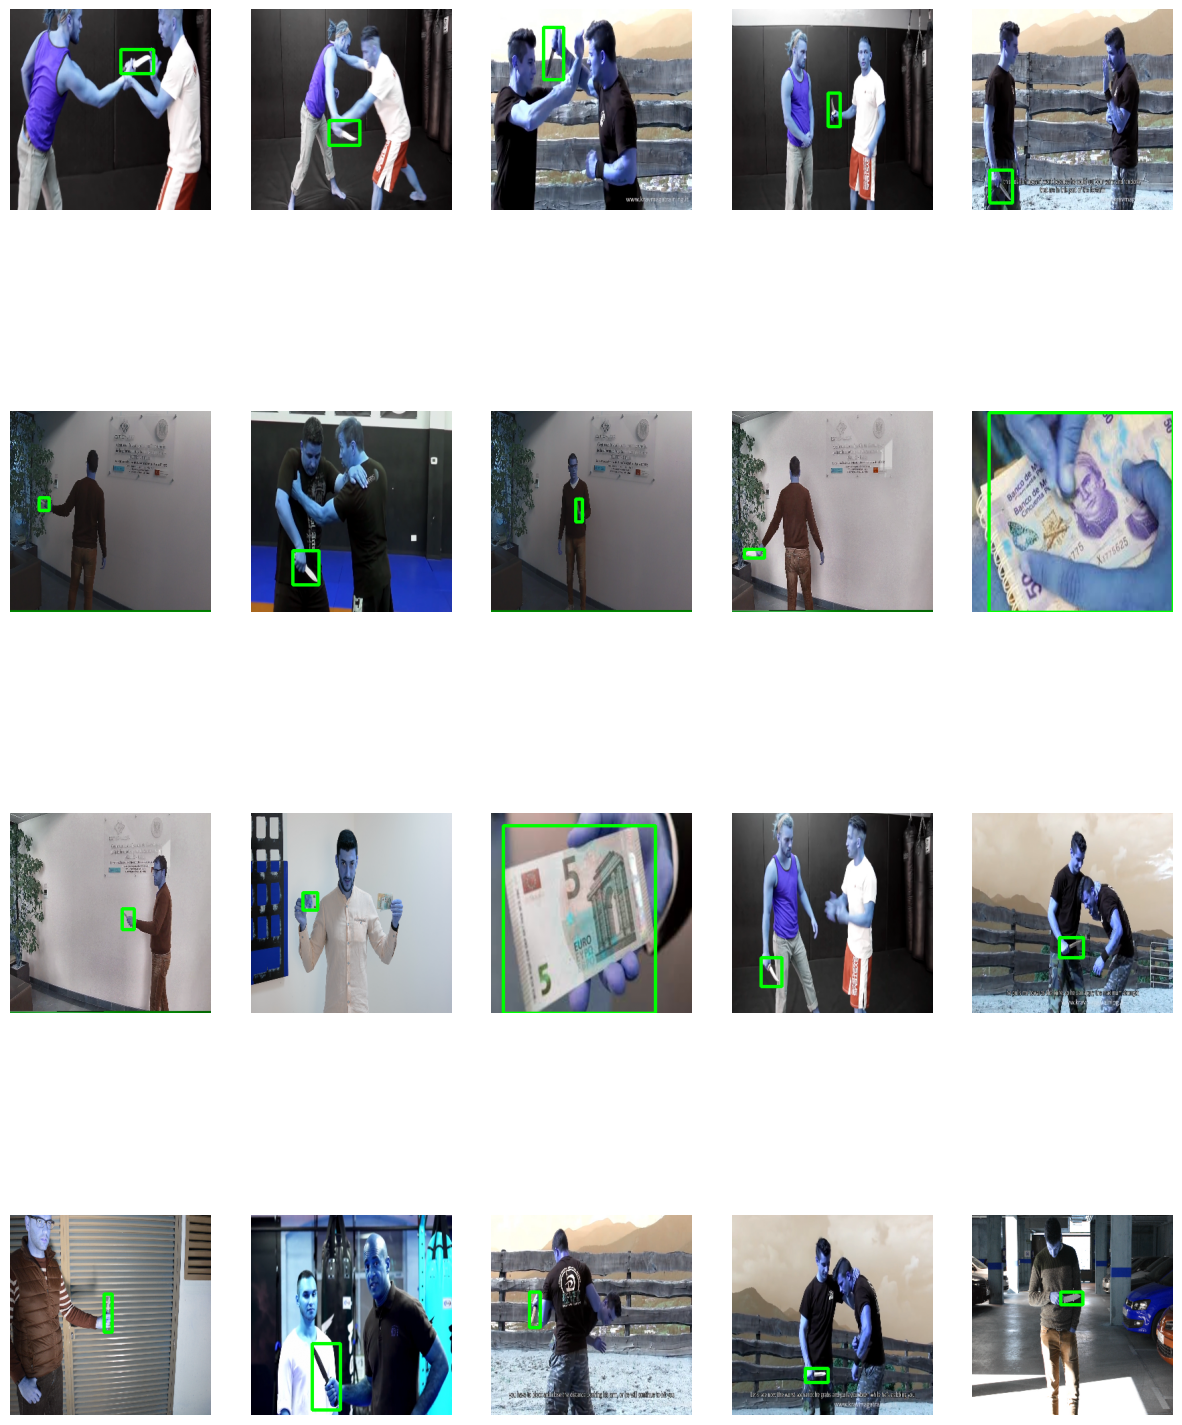

In [13]:
# Create a Matplotlib figure
plt.figure(figsize=(15,20));

# Generate a random sample of images each time the cell is run 
random_range = random.sample(range(1, len(train_img)), 20)

for itr, i in enumerate(random_range,1):

    # Bounding box of each image
    a1, b1, a2, b2 = train_boxes[i];
    img_size = 300

    # Rescaling the boundig box values to match the image size
    x1 = a1 * img_size
    x2 = a2 * img_size
    y1 = b1 * img_size
    y2 = b2 * img_size

    # The image to visualize
    image = train_img[i]

    # Draw bounding boxes on the image
    cv2.rectangle(image, (int(x1),int(y1)),
          (int(x2),int(y2)),
                  (0,255,0),
                  3);
    
    # Clip the values to 0-1 and draw the sample of images
    img = np.clip(train_img[i], 0, 1)
    plt.subplot(4, 5, itr);
    plt.imshow(img);
    plt.axis('off');

In [14]:
# Split the data of images, labels and their annotations
train_images, val_images, train_labels,val_labels, train_boxes, val_boxes = train_test_split( np.array(train_img), 
                np.array(train_labels), np.array(train_boxes), test_size = 0.1,random_state = 43)
 
print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images), 
    len(val_images)))

Total Training Images: 721, Total Test Images: 81


In [15]:
import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import SGD
image_size=300

In [16]:
N_mobile = tf.keras.applications.NASNetMobile( input_tensor = Input(
    shape=(image_size, image_size, 3)), 
    include_top=False, 
    weights='imagenet')

19993432/19993432 [==============================] - 1s 0us/step


In [17]:
def create_model(no_of_classes):
 
    # Freeze the whole model
    N_mobile.trainable = False
    base_model_output = N_mobile.output
    flattened_output = GlobalAveragePooling2D()(base_model_output)
    print(flattened_output.shape)
    class_prediction = Dense(256, activation="relu")(flattened_output)
    class_prediction = Dense(128, activation="relu")(class_prediction )
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(64, activation="relu")(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction )
    class_prediction = Dense(32, activation="relu")(class_prediction)
    class_prediction = Dense(no_of_classes, activation='softmax',name="class_output")(class_prediction)
    box_output = Dense(256, activation="relu")(flattened_output)
    box_output = Dense(128, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(64, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(32, activation="relu")(box_output)
    box_predictions = Dense(4, activation='sigmoid',
                            name= "box_output")(box_output)

    model = Model(inputs=N_mobile.input, outputs= [box_predictions, class_prediction])
 
    return model

In [18]:
model = create_model(2)
model

(None, 1056)


In [19]:
losses = { 
    "box_output": "mean_squared_error",
    "class_output": "sparse_categorical_crossentropy"
    }
loss_weights = {
    "box_output": 1.0, 
    "class_output": 1.0
    }
 
metrics = {
    'class_output': 'accuracy', 
    'box_output':  'mse'
    }
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 40, 
                    restore_best_weights = True
                     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.0002, 
                              patience = 30, min_lr = 1e-7, verbose = 1)
 
# Initialize Optimizer
opt = SGD(learning_rate = 1e-3, momentum = 0.9)
 
# Compile the model with Adam optimizer
model.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [20]:
with tf.device('/device:GPU:0'):
  history = model.fit(x = train_images, 
                      y= {
                          "box_output": train_boxes, 
                          "class_output": train_labels
                          }, 
                      validation_data=(
                          val_images, 
                          {
                            "box_output": val_boxes, 
                            "class_output": val_labels
                            }), batch_size = 32, epochs = 5, 
                      callbacks=[reduce_lr, stop])

Epoch 1/5
23/23 [==============================] - 87s 3s/step - loss: 0.6948 - box_output_loss: 0.0511 - class_output_loss: 0.6437 - box_output_mse: 0.0511 - class_output_accuracy: 0.6214 - val_loss: 0.5279 - val_box_output_loss: 0.0457 - val_class_output_loss: 0.4822 - val_box_output_mse: 0.0457 - val_class_output_accuracy: 0.8025 - lr: 0.0010
Epoch 2/5
23/23 [==============================] - 64s 3s/step - loss: 0.5613 - box_output_loss: 0.0500 - class_output_loss: 0.5113 - box_output_mse: 0.0500 - class_output_accuracy: 0.7434 - val_loss: 0.4462 - val_box_output_loss: 0.0450 - val_class_output_loss: 0.4013 - val_box_output_mse: 0.0450 - val_class_output_accuracy: 0.8025 - lr: 0.0010
Epoch 3/5
23/23 [==============================] - 60s 3s/step - loss: 0.5061 - box_output_loss: 0.0499 - class_output_loss: 0.4562 - box_output_mse: 0.0499 - class_output_accuracy: 0.7531 - val_loss: 0.3889 - val_box_output_loss: 0.0443 - val_class_output_loss: 0.3446 - val_box_output_mse: 0.0443 - val

In [21]:
def plot(var1, var2, plot_name):
  # Get the loss metrics from the trained model
  c1 = history.history[var1]
  c2 = history.history[var2]
 
  epochs = range(len(c1)
                )
   
  # Plot the metrics
  plt.plot(epochs, c1, 'b', label=var1)
  plt.plot(epochs, c2, 'r', label=var2)
  plt.title(str(plot_name))
  plt.legend()

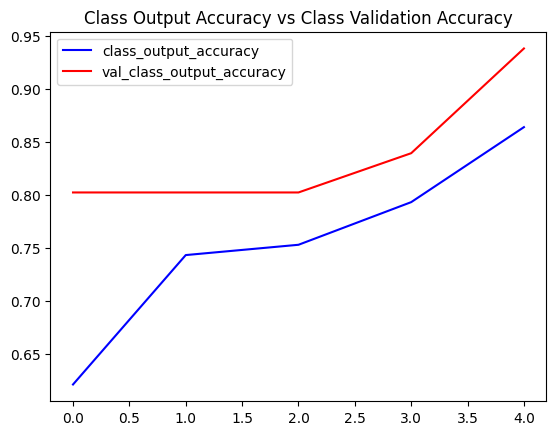

In [22]:
plot( 'class_output_accuracy', 'val_class_output_accuracy', 'Class Output Accuracy vs Class Validation Accuracy')

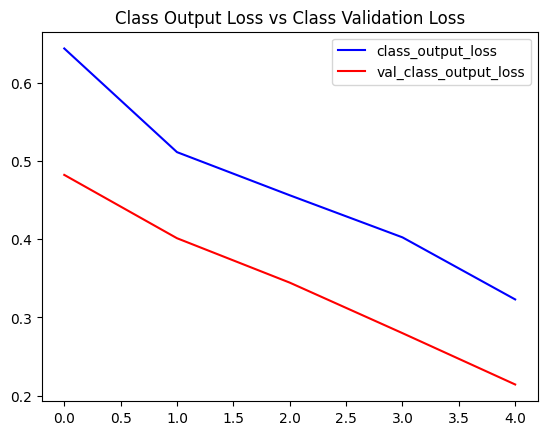

In [23]:
plot( 'class_output_loss', 'val_class_output_loss', 'Class Output Loss vs Class Validation Loss')

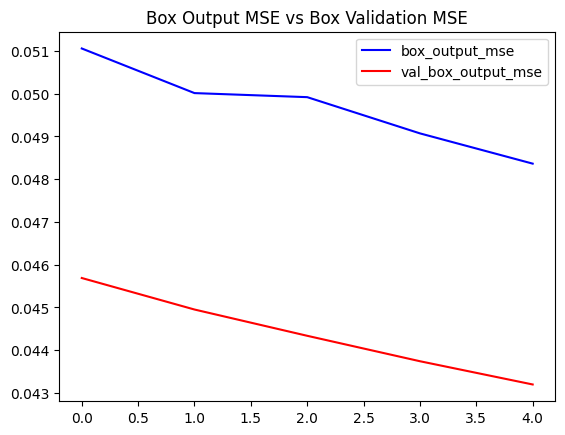

In [24]:
plot( 'box_output_mse', 'val_box_output_mse', 'Box Output MSE vs Box Validation MSE')

In [25]:
#Save your model here in .h5 format.
model.save('caltech_normal.h5')

In [26]:
global label_names
 
# Must be same as the Annotations list we used
label_names = sorted(class_list)

In [27]:
def predict(image, returnimage = False,  scale = 0.9):
   
  processed_image = preprocess(image)
  results = model.predict(processed_image)
 
  label, (x1, y1, x2, y2), confidence = postprocess(image, results)
  cv2.rectangle(image, (x1,y1), (x2,y2), (0, 255, 100), 2)
  cv2.putText(
      image, 
      '{}'.format(label, confidence), 
      (x1, y2+(50)), 
      cv2.FONT_HERSHEY_COMPLEX, scale,
      (200, 300, 100),2)

 
  # Show the Image with matplotlib
  plt.figure(figsize=(10,10))
  plt.imshow(image[:,:,::-1])

In [28]:
def preprocess(img, image_size = 300):
   
    image = cv2.resize(img, (image_size, image_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float") / 255.0
    # Expand dimensions as predict expect image in batches
    image = np.expand_dims(image, axis=0) 
    return image

In [29]:
def postprocess(image, results):
 
    # Split the results into class probabilities and box coordinates
    bounding_box, class_probs = results
    class_index = np.argmax(class_probs)
   
    # Use this index to get the class name.
    class_label = label_names[class_index]

    h, w = image.shape[:2]
 
    # Extract the Coordinates
    x1, y1, x2, y2 = bounding_box[0]
 
    # Convert the coordinates from relative (i.e. 0-1) to actual values
    x1 = int(w * x1)
    x2 = int(w * x2)
    y1 = int(h * y1)
    y2 = int(h * y2)
 
    # return the lable and coordinates
    return class_label, (x1,y1,x2,y2),class_probs